# Welter issue #9
## Generate synthetic, noised-up two-temperature model spectra, then naively fit a single temperature model to it.
### Part 7- Prepare for *IGRINS*

Michael Gully-Santiago  
Monday, January 11, 2016  

See the previous notebook for the theory and background.

Steps:
1. Modify all the config and phi files to have the values from the MCMC run.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('paper', font_scale=1.4)
sns.set_style('ticks')

In [3]:
import os
import json
import pandas as pd
import yaml
import h5py

In [4]:
sf_dat = pd.read_csv('../data/analysis/IGRINS_LkCa4_run02_last20kMCMC.csv')

## Set the value of the config files to all the same values.

In [16]:
ms = sf_dat.m_val[sf_dat.Teff_50p == sf_dat.Teff_50p]

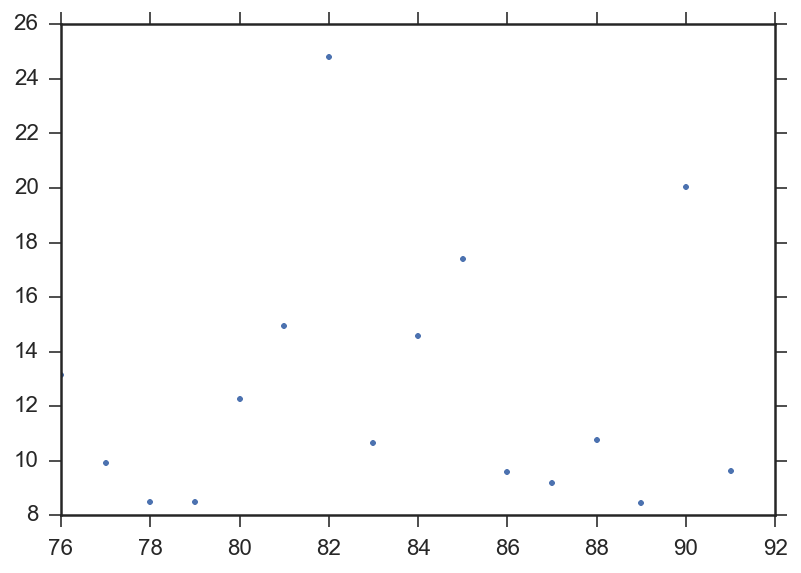

In [17]:
plt.plot(sf_dat.m_val, sf_dat.ll_50p, '.')

In [18]:
for m in ms:
    index = sf_dat.index[sf_dat.m_val == m]
    mdir = 'm{:03d}'.format(m)
    sf_out = '../sf/m{:03d}/config.yaml'.format(m)

    f2 = open(sf_out)
    config = yaml.load(f2)
    f2.close()

    ii = index.values[0]
    
    config['Theta']['grid'] = [4100.0, 3.5, 0.0]
    config['Theta']['vsini'] = float(30.0)
    config['Theta']['vz'] = float(95.0)
    config['Theta']['logOmega'] = float(-0.26)
    if (sf_dat.logO_50p[ii] == sf_dat.logO_50p[ii]):
        config['Theta']['logOmega'] = float(sf_dat.logO_50p[ii])

    with open(sf_out, mode='w') as outfile:
        outfile.write(yaml.dump(config))

In [19]:
for m in ms:
    index = sf_dat.index[sf_dat.m_val == m]
    mdir = 'm{:03d}'.format(m)
    
    phi_out = '../sf/m{:03d}/s0_o0phi.json'.format(m)

    jf = open(phi_out)
    phi = json.load(jf)
    jf.close()

    ii = index.values[0]
    
    c1, c2, c3 = sf_dat.c1_50p[ii], sf_dat.c2_50p[ii], sf_dat.c3_50p[ii]
    if c1 != c1:
        print("default: {}".format(m))
        phi['cheb'] = [0.0,0.0,0.0]
        phi['logAmp']= -1.95
        phi['sigAmp']= 0.4
        phi['l']= 10.0
    if c1 == c1:
        print("actual: {}".format(m))
        phi['cheb'] = [c1, c2, c3]
        if sf_dat.LA_50p[ii] > -1.4:
            phi['logAmp']= -1.4
        else:
            phi['logAmp']= sf_dat.LA_50p[ii]
        phi['sigAmp']= sf_dat.SA_50p[ii]
        phi['l']= sf_dat.ll_50p[ii]
    
    phi['fix_c0'] = True
    
    with open(phi_out, mode='w') as outfile:
        json.dump(phi, outfile, indent=2)

actual: 76
actual: 77
actual: 78
actual: 79
actual: 80
actual: 81
actual: 82
actual: 83
actual: 84
actual: 85
actual: 86
actual: 87
actual: 88
actual: 89
actual: 90
actual: 91


The end.